In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
ts = pd.read_csv('Daily Sales Time Series.csv', parse_dates=['Date'], index_col='Date')

ts.head()


,Daily_Sales,Year,Month,Day,Weekday
Date,,,,,
2010-12-01,46376.49,2010,12,1,Wednesday
2010-12-02,47316.53,2010,12,2,Thursday
2010-12-03,23921.71,2010,12,3,Friday
2010-12-04,0.00,2010,12,4,Saturday
2010-12-05,31771.60,2010,12,5,Sunday


In [2]:
train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]['Daily_Sales']
test = ts.iloc[train_size:]['Daily_Sales']


In [ ]:
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=7
)

hw_model = model.fit()


In [4]:
train = train.asfreq('D')
test = test.asfreq('D')


In [ ]:
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=7,
    initialization_method='estimated'
)

hw_model = model.fit(optimized=True)


In [6]:
test_predictions = hw_model.forecast(len(test))
test_predictions.head()


2011-09-26    39095.231627
2011-09-27    48315.539336
2011-09-28    42292.868072
2011-09-29    54694.854147
2011-09-30    37006.297986
Freq: D, dtype: float64

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, test_predictions))
rmse


22400.633069718733

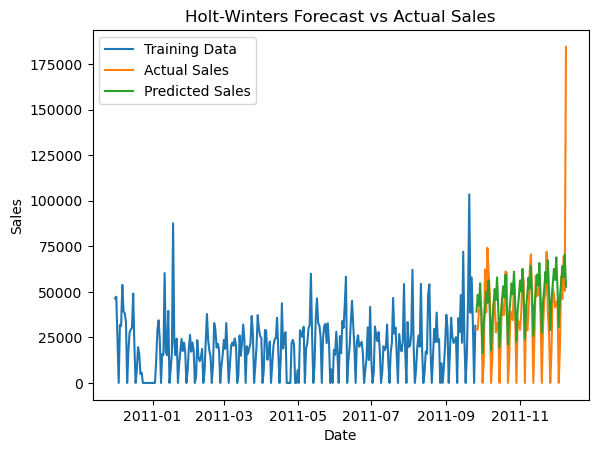

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, test_predictions, label='Predicted Sales')
plt.legend()
plt.title('Holt-Winters Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [11]:
future_forecast = hw_model.forecast(180)


In [12]:
forecast_df = pd.DataFrame({
    'Date': future_forecast.index,
    'Forecasted_Sales': future_forecast.values
})


In [13]:
forecast_df.to_csv('Sales Forecast 6 Months.csv', index=False)


In [14]:
forecast_df.head()


,Date,Forecasted_Sales
0,2011-09-26,39095.231627
1,2011-09-27,48315.539336
2,2011-09-28,42292.868072
3,2011-09-29,54694.854147
4,2011-09-30,37006.297986


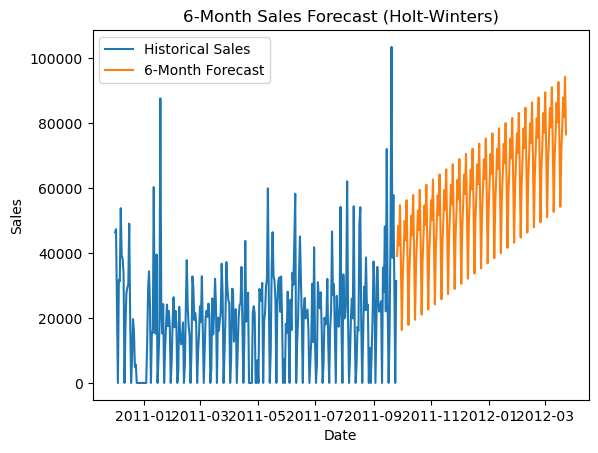

In [15]:
plt.figure()
plt.plot(train.index, train, label='Historical Sales')
plt.plot(future_forecast.index, future_forecast, label='6-Month Forecast')
plt.legend()
plt.title('6-Month Sales Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [16]:
future_forecast = hw_model.forecast(180)
